In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

E:\Users\puzheng\Documents\ImageAnalysis3\library_tools\sequences.py:371: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if infotype is 'input' or infotype is 'all':
E:\Users\puzheng\Documents\ImageAnalysis3\library_tools\sequences.py:371: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if infotype is 'input' or infotype is 'all':
E:\Users\puzheng\Documents\ImageAnalysis3\library_tools\references.py:32: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if infotype is 'input' or infotype is 'all':
E:\Users\puzheng\Documents\ImageAnalysis3\library_tools\references.py:32: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if infotype is 'input' or infotype is 'all':


1860


In [84]:
save_fig_folder = r'X:\IgH_analyzed_results\IgH_results'

In [41]:
# load features
feature_2_reg_id = pickle.load(open(os.path.join(r'\\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-08_IgH', 'matched_feature_dict.pkl'), 'rb'))

In [98]:
bone_marrow_data = pickle.load(open(r'\\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20201012_bone_marrow_igh++\Picked_spots_fov_3-12.pkl','rb'))

In [99]:
from scipy.spatial.distance import pdist, squareform
distmaps = np.array([squareform(pdist(_hzxys[:,1:4])) for _hzxys in bone_marrow_data['hzxys']])
median_distmap = np.nanmedian(distmaps, axis=0)
loss_rates = np.mean(np.sum(np.isnan(bone_marrow_data['hzxys']), axis=2)>0, axis=0)

In [100]:
dna_reg_ids = np.array([ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 321, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 337, 339, 340,
       341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
       354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366,
       367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 379, 380,
       381, 382, 383, 384, 386, 387, 388, 389, 390, 391, 392, 393, 394,
       395])

v_unit_2_inds = {_k: list(dna_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighv' in _k}
d_unit_2_inds = {_k: list(dna_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighd' in _k}
j_unit_2_inds = {_k: list(dna_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighj' in _k}

In [101]:
save_fig_folder = os.path.join(save_fig_folder, 'v2')
os.makedirs(save_fig_folder)

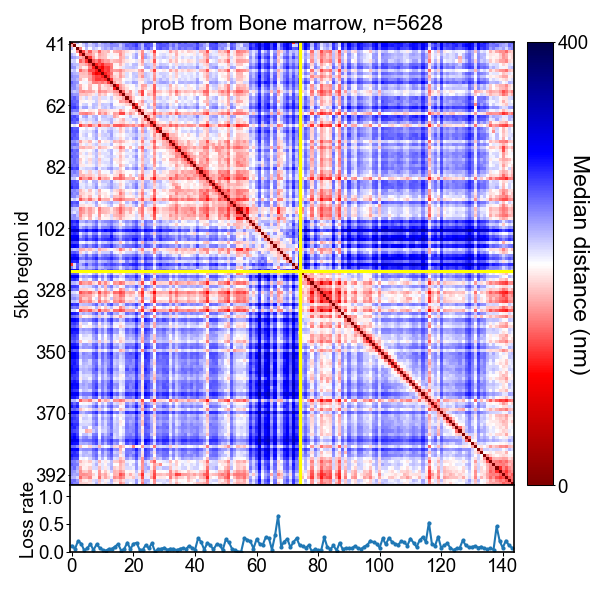

<ipython-input-104-a3db350bdbc6>:61: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("seismic"))
  contact_cmap.set_bad(color=[0.,0.,0.,1])
<ipython-input-104-a3db350bdbc6>:70: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  _pf = ax1.imshow(contact_map, cmap=contact_cmap, norm=contact_norm,vmin=contact_limits[0],


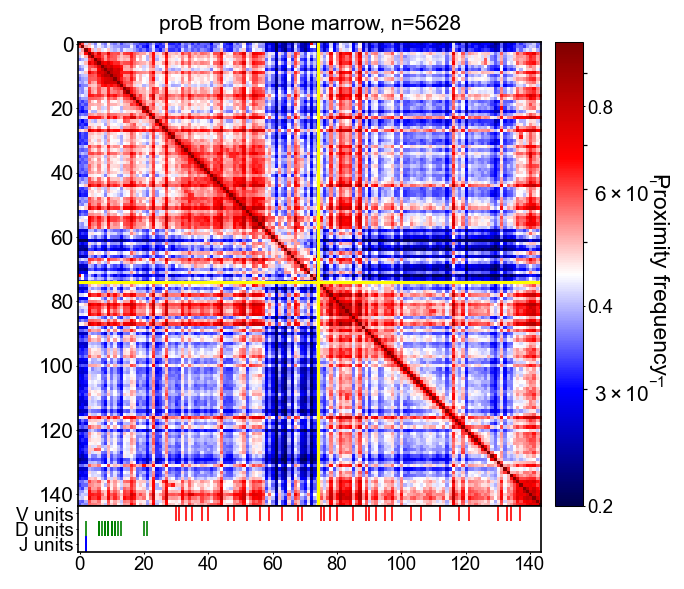

In [104]:
# Required plotting parameters
from ImageAnalysis3.figure_tools import _dpi,_single_col_width,_double_col_width,_single_row_height,_ref_bar_length, _ticklabel_size,_ticklabel_width
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.colors import LogNorm
_font_size = 9

color_limits = [0, 400]

fig, ax1 = plt.subplots(figsize=(_single_col_width*2, _single_col_width*2), dpi=150, )

ax1.set_title(f"proB from Bone marrow, n={len(distmaps)}", fontsize=10)
_pf = ax1.imshow(median_distmap, cmap='seismic_r', vmin=min(color_limits), vmax=max(color_limits))
ax1.axvline(x=np.where(dna_reg_ids>300)[0][0], color=[1,1,0])
ax1.axhline(y=np.where(dna_reg_ids>300)[0][0], color=[1,1,0])
_ticks = np.arange(0, len(dna_reg_ids), 20)
ax1.set_yticks(_ticks)
ax1.set_yticklabels(dna_reg_ids[_ticks])
ax1.set_ylabel(f"5kb region id", fontsize=_font_size, labelpad=1)


ax1.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelbottom=False) # remove bottom ticklabels for ax1
# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="3%")
cbar = plt.colorbar(_pf,cax=cax, ax=ax1, ticks=color_limits)
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Median distance (nm)',
               fontsize=_font_size+2, labelpad=0, rotation=270)
# create bottom ax
bot_ax = divider.append_axes('bottom', size='15%', pad="0%", 
                             sharex=ax1, xticks=np.arange(0,len(median_distmap), 50), yticks=[0,0.5,1] )

bot_ax.plot(loss_rates, '.-', markersize=2, linewidth=1)
bot_ax.set_xticks(np.arange(0,len(median_distmap),20))
bot_ax.set_ylim([0,1.2])
bot_ax.set_ylabel(f"Loss rate", fontsize=9, labelpad=0)
bot_ax.tick_params('both', labelsize=_font_size, 
                   width=_ticklabel_width, length=_ticklabel_size,
                   pad=1, labelleft=True) # remove bottom ticklabels for ax1
plt.savefig(os.path.join(save_fig_folder, 'bone_marrow_median_loss.png'), transparent=True)
plt.show()


from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.colors import LogNorm

_font_size = 9

contact_limits = [0.2, 1]
contact_norm = LogNorm(vmin=np.min(contact_limits), 
                       vmax=np.max(contact_limits))
contact_cmap = matplotlib.cm.get_cmap('seismic')
contact_cmap.set_bad(color=[0.,0.,0.,1])

contact_th = 200
contact_map = (distmaps < contact_th).sum(0) / (np.isnan(distmaps)==False).sum(0)

fig, ax1 = plt.subplots(figsize=(_single_col_width*2, _single_col_width*2), dpi=150, )
#_pf = ax1.imshow(median_distmap, cmap='seismic_r', vmin=0, vmax=600)
ax1.set_title(f"proB from Bone marrow, n={len(distmaps)}", fontsize=10)

_pf = ax1.imshow(contact_map, cmap=contact_cmap, norm=contact_norm,vmin=contact_limits[0],
                       vmax=contact_limits[1])

ax1.axvline(x=np.where(dna_reg_ids>300)[0][0], color=[1,1,0])
ax1.axhline(y=np.where(dna_reg_ids>300)[0][0], color=[1,1,0])
ax1.tick_params('both', labelsize=_font_size+1, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelbottom=False) # remove bottom ticklabels for ax1
# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="3%")
colorbar_ticks = [0.05, 0.1, 0.2, 0.4, 0.8]
cbar = plt.colorbar(_pf,cax=cax, ax=ax1, ticks=colorbar_ticks)
cbar.ax.set_yticklabels(colorbar_ticks)
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Proximity frequency',
               fontsize=_font_size+2, labelpad=2.5, rotation=270)
# create bottom ax
bot_ax = divider.append_axes('bottom', size='10%', pad="0%", 
                             sharex=ax1, xticks=np.arange(0,len(median_distmap), 20) )

bot_ax.eventplot(list(v_unit_2_inds.values()), lineoffsets=2.5, linewidths=0.8, colors='r')
bot_ax.eventplot(list(d_unit_2_inds.values()), lineoffsets=1.5, linewidths=0.8, colors='g')
bot_ax.eventplot(list(j_unit_2_inds.values()), lineoffsets=0.5, linewidths=0.8, colors='b')
bot_ax.set_ylim([0,3])
bot_ax.set_yticks([2.5,1.5, 0.5])
bot_ax.set_yticklabels(["V units", "D units", "J units"], fontsize=_font_size)
bot_ax.tick_params('both', labelsize=_font_size, 
                   width=_ticklabel_width, length=_ticklabel_size-1,
                   pad=1, labelleft=True) # remove bottom ticklabels for bot_ax
plt.savefig(os.path.join(save_fig_folder, 'bone_marrow_proximity_vdj_feature.png'), transparent=True)
plt.show()

In [105]:
from ImageAnalysis3.spot_tools.scoring import radius_of_gyration

In [124]:
bone_marrow_rgs = [radius_of_gyration(_hzxy[:,1:]) for _hzxy in bone_marrow_data['hzxys']]
iaa_dox_rgs = [radius_of_gyration(_hzxy[:,1:]) for _hzxy in iaa_dox_data['hzxys']]

In [128]:
dmso_rgs = [radius_of_gyration(_hzxy[:,1:]) for _hzxy in dmso_data['hzxys']]

X:\IgH_analyzed_results\IgH_results\v2\RG_combined.png


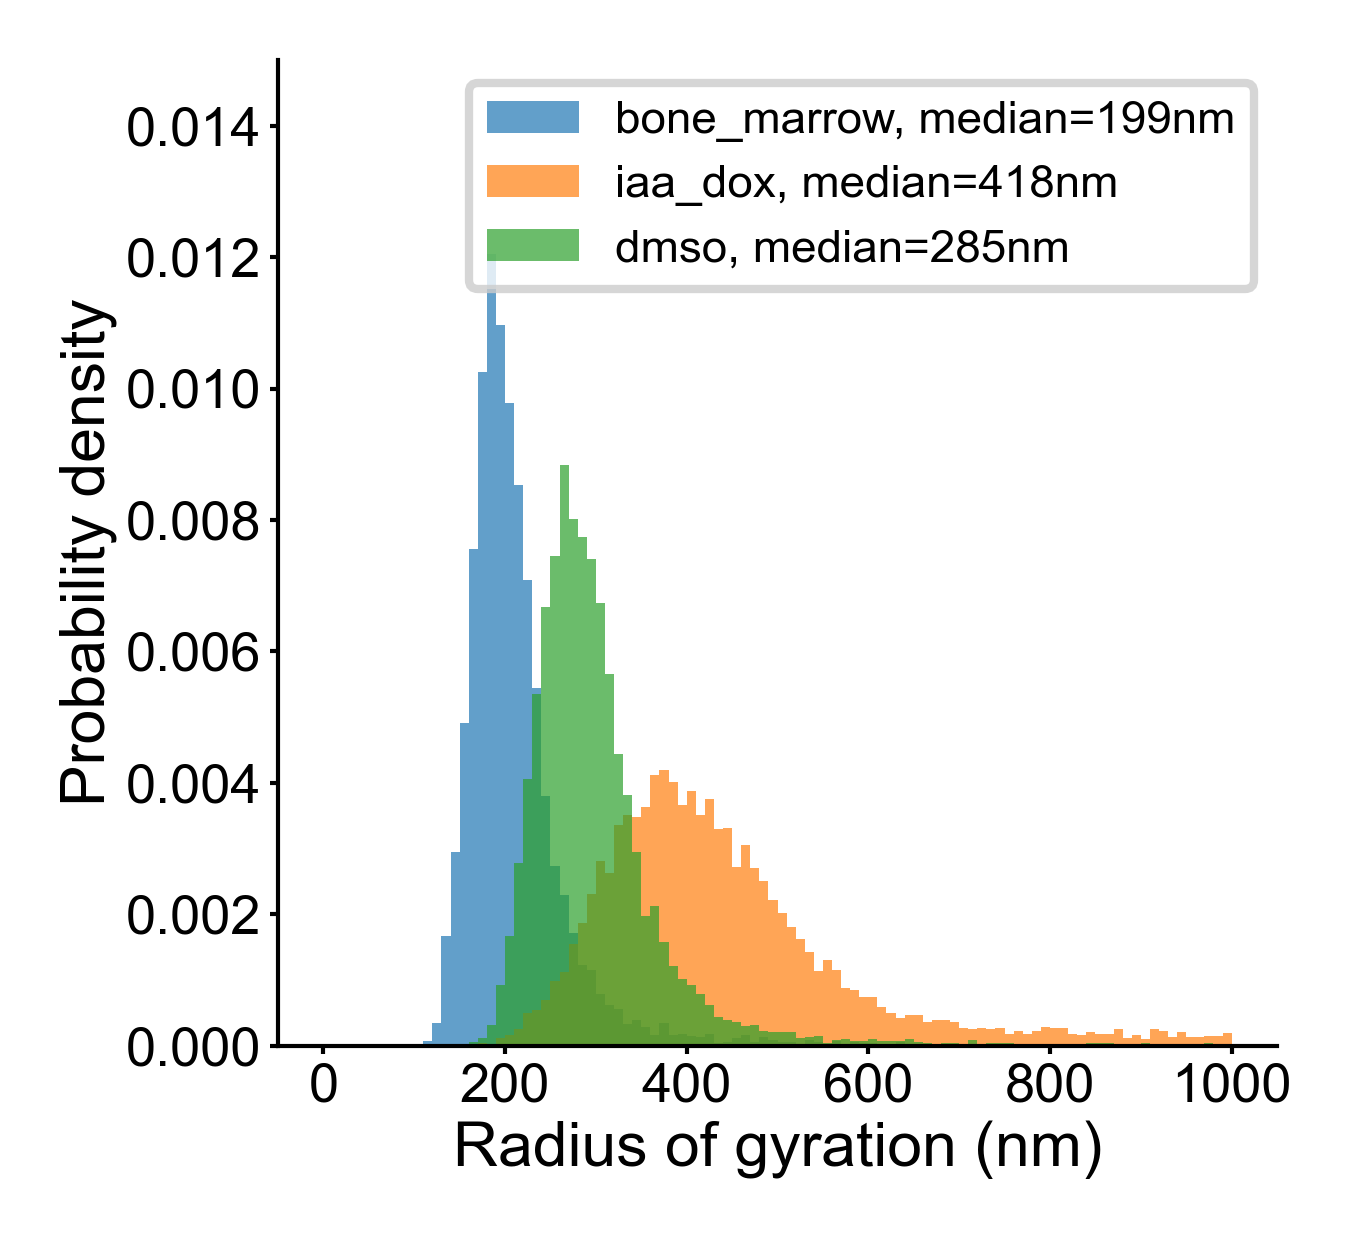

In [134]:
_font_size=7.5
fig, ax = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=600)
ax.hist(bone_marrow_rgs, 100, range=(0,1000), 
        density=True,  
        alpha=0.7, label=f'bone_marrow, median={np.nanmedian(bone_marrow_rgs):.0f}nm')
ax.hist(iaa_dox_rgs, 100, range=(0,1000), 
        density=True,  
        alpha=0.7, label=f'iaa_dox, median={np.nanmedian(iaa_dox_rgs):.0f}nm')
ax.hist(dmso_rgs, 100, range=(0,1000), 
        density=True,  
        alpha=0.7, label=f'dmso, median={np.nanmedian(dmso_rgs):.0f}nm')

ax.tick_params('both', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(fontsize=_font_size-2)
ax.set_xlabel("Radius of gyration (nm)", labelpad=1, fontsize=_font_size)
ax.set_ylabel("Probability density", labelpad=1, fontsize=_font_size)
ax.set_ylim([0,0.015])
plt.gcf().subplots_adjust(bottom=0.15, left=0.16)
save_file = os.path.join(save_fig_folder, f'RG_combined.png')
plt.savefig(save_file, transparent=True)
print(save_file)
plt.show()

In [135]:
from ImageAnalysis3.compartment_tools.scoring import spot_density_scores

In [136]:
segment_dict = {'proximal':np.where(dna_reg_ids<300)[0], 'distal':np.where(dna_reg_ids>300)[0]}

In [148]:
# density for the entire chr
import multiprocessing as mp
num_threads=12
density_var = 75 # nm

_dna_density_args = [(_hzxys,_hzxys, segment_dict, [density_var,density_var,density_var], True) 
                     for _hzxys in dmso_data['hzxys']]
_dna_density_time = time.time()

print(f"Multiprocessing calculate dna_density_scores", end=' ')
with mp.Pool(num_threads) as dna_density_pool:
    dmso_density_dicts = dna_density_pool.starmap(spot_density_scores, _dna_density_args)
    dna_density_pool.close()
    dna_density_pool.join()
    dna_density_pool.terminate()
print(f"in {time.time()-_dna_density_time:.3f}s.")

Multiprocessing calculate dna_density_scores in 20.800s.


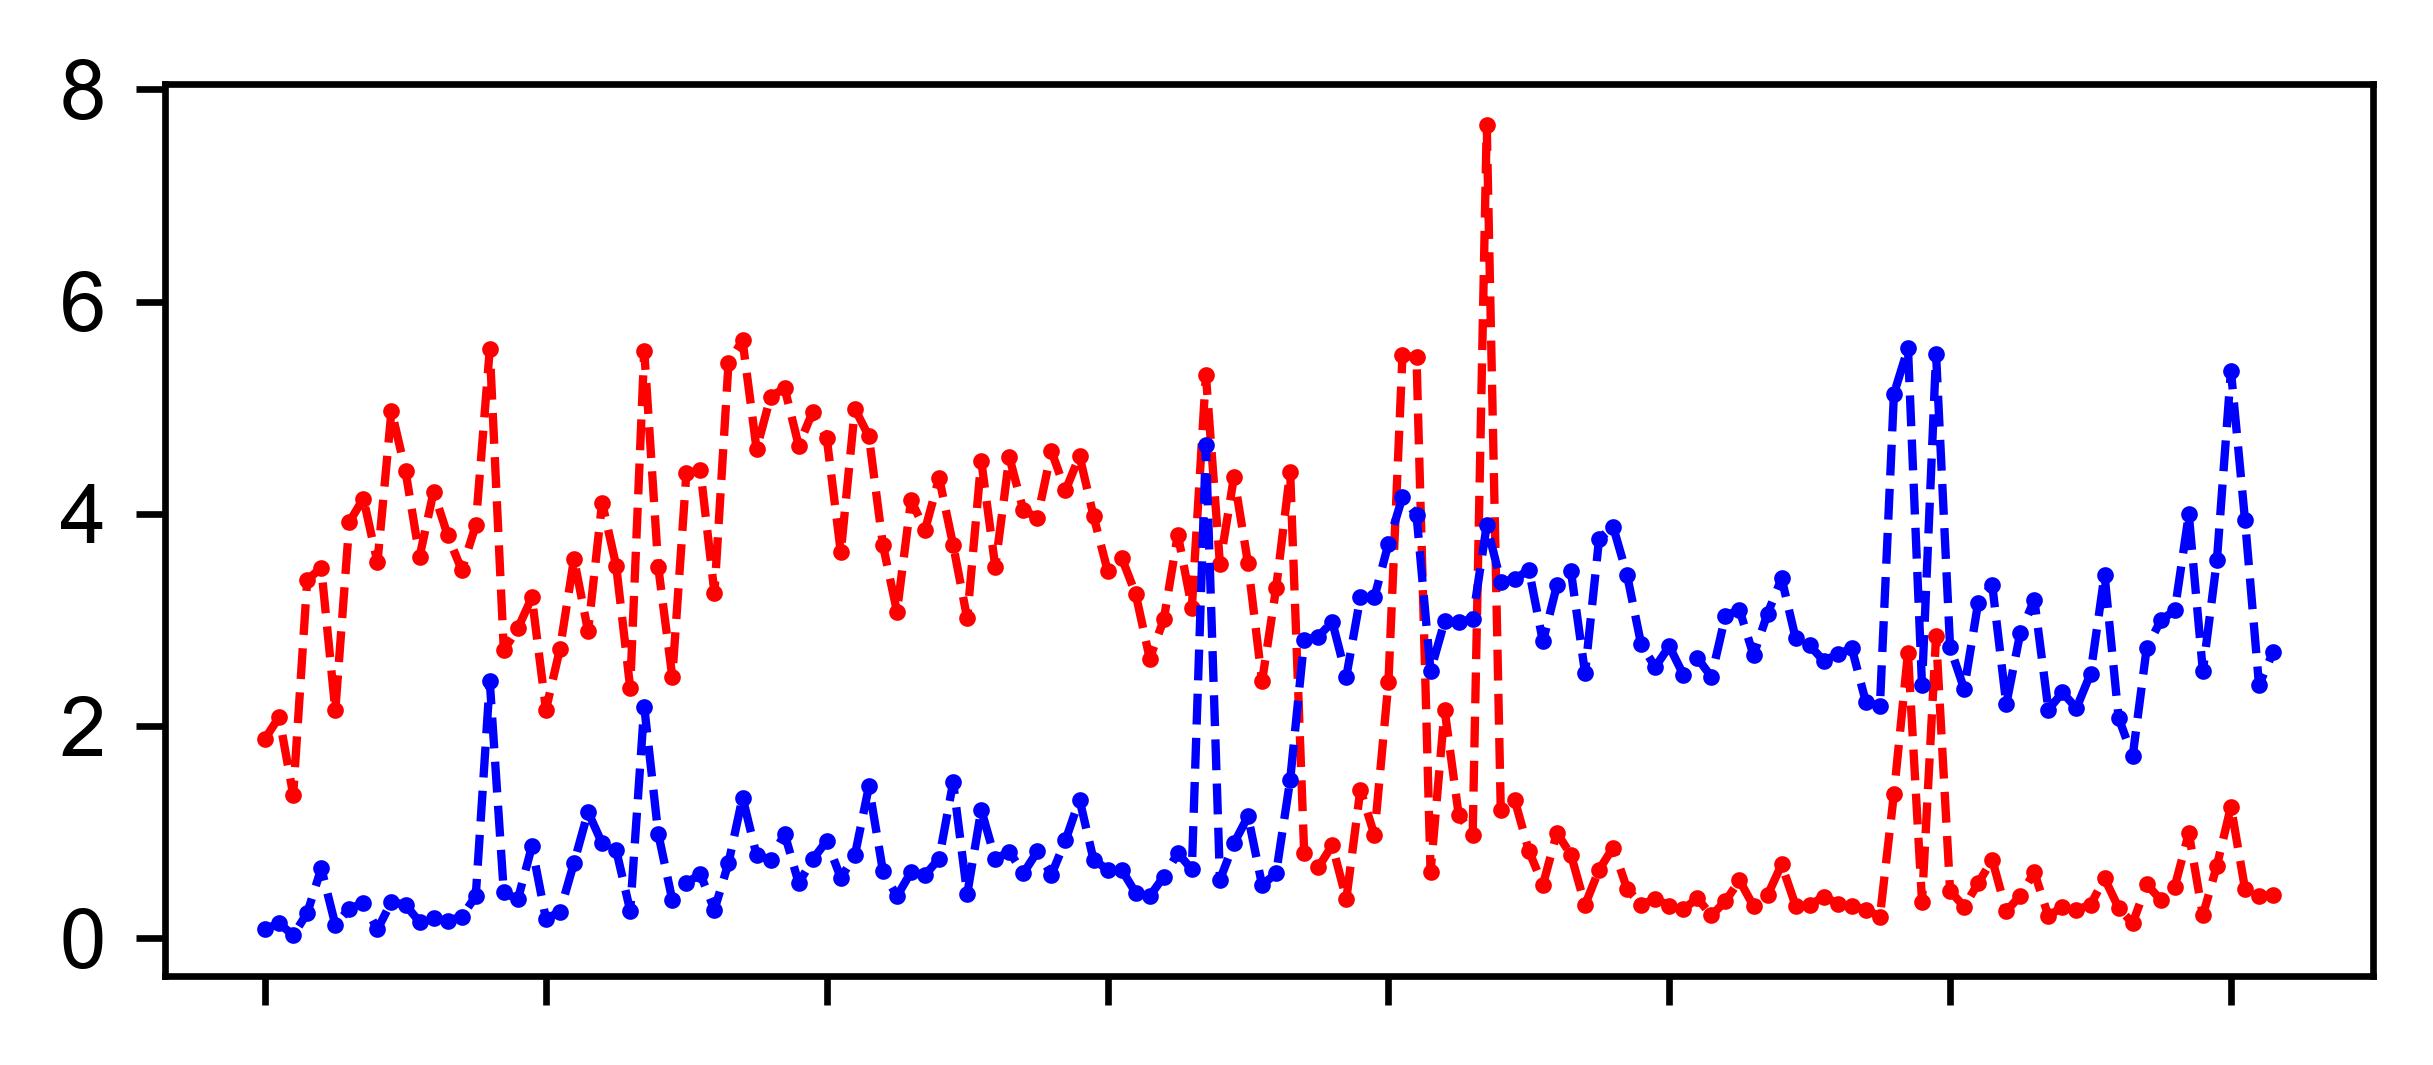

In [150]:
# Calculate mean proximal, distal density
mean_proximal_scores = np.nanmedian([_s['proximal'] for _s in dmso_density_dicts], axis=0)
mean_distal_scores = np.nanmedian([_s['distal'] for _s in dmso_density_dicts], axis=0)

# Plot
fig = plt.figure(figsize=(_double_col_width, _single_col_width),dpi=600)
grid = plt.GridSpec(2, 1, height_ratios=[7,1], hspace=0., wspace=0.2)

main_ax = plt.subplot(grid[0], xticklabels=[])

main_ax.plot(mean_proximal_scores, 'r.--', label='A density', markersize=2, linewidth=1)
main_ax.plot(mean_distal_scores, 'b.--', label='B density', markersize=2, linewidth=1)
plt.show()

In [ ]:
def separation_score(density_dict, name1, name2, identity_dict, 
                     cloud_th_per=67):
    """"""
    # generate a 
    den1 = density_dict[name1]
    den2 = density_dict[name2]
    

In [ ]:
def randomize_AB_dict(AB_dict):
    all_regs = np.sort(np.concatenate(list(AB_dict.values())))
    AB_identities = np.zeros(len(all_regs))
    AB_identities[np.array([_i for _i,_r in enumerate(all_regs) 
                            if _r in AB_dict['A']])] = 1
    # randomize new start
    new_start = np.random.randint(0, len(all_regs))
    new_AB_identities = np.concatenate([AB_identities[new_start:], AB_identities[:new_start]])
    # recreate AB_dict
    new_AB_dict = {'A': np.sort(all_regs[np.where(new_AB_identities==1)[0]]),
                   'B': np.sort(all_regs[np.where(new_AB_identities==0)[0]]),}
    return new_AB_dict

# calculate dynamic fraction scores
from scipy.stats import scoreatpercentile

AB_identities_rep1 = np.ones(len(data_rep1['dna_zxys'][0])) * np.nan
AB_identities_rep1[data_rep1['AB_dict']['A']] = 1
AB_identities_rep1[data_rep1['AB_dict']['B']] = 0

from tqdm import tqdm
# calculate re-thresholded fraction scores
A_fracs, B_fracs = [], []
A_ths, B_ths = [], []
cloud_th_per=67
for _sd in tqdm(data_rep1['dna_density_scores']):
    # define A,B threshold based on their own densities
    _A_th = scoreatpercentile(_sd['A'][data_rep1['AB_dict']['A']], 100-cloud_th_per)
    _B_th = scoreatpercentile(_sd['B'][data_rep1['AB_dict']['B']], 100-cloud_th_per)
    # calculate purity within A,B clouds
    A_fracs.append(np.nanmean(AB_identities_rep1[np.where(_sd['A'] >= _A_th)[0]]))
    B_fracs.append(1-np.nanmean(AB_identities_rep1[np.where(_sd['B'] >= _B_th)[0]]))
    # store AB thresholds for references
    A_ths.append(_A_th)
    B_ths.append(_B_th)
# calculate re-thresholded fraction scores
rand_A_fracs, rand_B_fracs = [], []

for _sd in tqdm(data_rep1['dna_density_scores']):
    # randomize AB dict
    _rand_AB_dict = randomize_AB_dict(data_rep1['AB_dict'])
    _rand_A_inds, _rand_B_inds = np.array(_rand_AB_dict['A']), np.array(_rand_AB_dict['B'])
    # generate randomized AB_identities_rep1 vector for purity calculation
    _rand_AB_identities_rep1 = np.ones(len(data_rep1['dna_zxys'][0])) * np.nan
    _rand_AB_identities_rep1[_rand_AB_dict['A']] = 1
    _rand_AB_identities_rep1[_rand_AB_dict['B']] = 0
    # define A,B threshold based on their own densities
    _A_th = scoreatpercentile(_sd['A'][_rand_A_inds], 100-cloud_th_per)
    _B_th = scoreatpercentile(_sd['B'][_rand_B_inds], 100-cloud_th_per)
    # calculate purity within A,B clouds
    rand_A_fracs.append(np.nanmean(_rand_AB_identities_rep1[np.where(_sd['A'] >= _A_th)[0]]))
    rand_B_fracs.append(1-np.nanmean(_rand_AB_identities_rep1[np.where(_sd['B'] >= _B_th)[0]]))

# iaa dox

In [87]:
iaa_dox_data = pickle.load(open(r'\\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20210320_IgH_proB_iaa_dox+\Picked_spots_fov_30-49.pkl','rb'))

In [88]:
from scipy.spatial.distance import pdist, squareform
distmaps = np.array([squareform(pdist(_hzxys[:,1:4])) for _hzxys in iaa_dox_data['hzxys']])
median_distmap = np.nanmedian(distmaps, axis=0)
loss_rates = np.mean(np.sum(np.isnan(iaa_dox_data['hzxys']), axis=2)>0, axis=0)

In [89]:
dna_reg_ids = np.array([ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 321, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 337, 339, 340,
       341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
       354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366,
       367, 368, 369, 371, 373, 374, 375, 377, 381, 383, 384, 386, 387,
       388, 389, 390, 391, 392, 393, 394, 395])

v_unit_2_inds = {_k: list(dna_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighv' in _k}
d_unit_2_inds = {_k: list(dna_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighd' in _k}
j_unit_2_inds = {_k: list(dna_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighj' in _k}

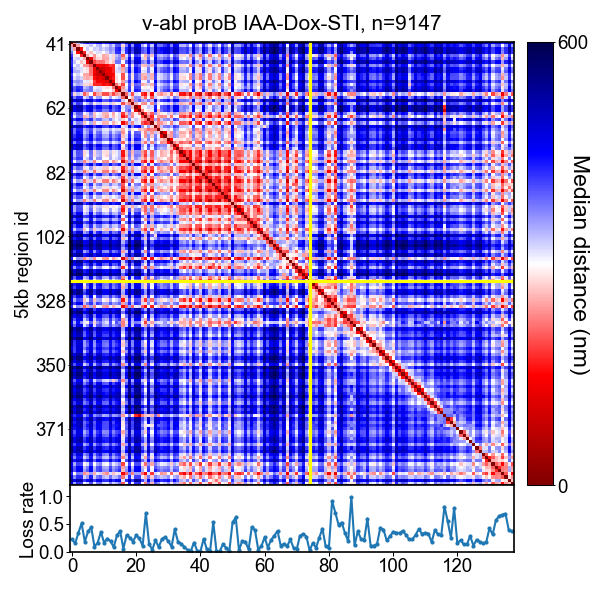

<ipython-input-90-607d2f5d741c>:59: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("seismic"))
  contact_cmap.set_bad(color=[0.,0.,0.,1])
<ipython-input-90-607d2f5d741c>:68: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  _pf = ax1.imshow(contact_map, cmap=contact_cmap, norm=contact_norm,vmin=contact_limits[0],


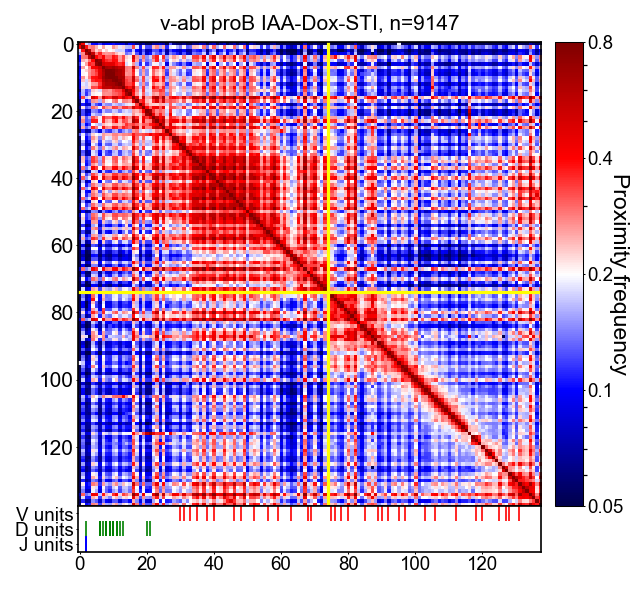

In [90]:
# Required plotting parameters
from ImageAnalysis3.figure_tools import _dpi,_single_col_width,_double_col_width,_single_row_height,_ref_bar_length, _ticklabel_size,_ticklabel_width
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.colors import LogNorm
_font_size = 9

fig, ax1 = plt.subplots(figsize=(_single_col_width*2, _single_col_width*2), dpi=150, )

ax1.set_title(f"v-abl proB IAA-Dox-STI, n={len(distmaps)}", fontsize=10)
_pf = ax1.imshow(median_distmap, cmap='seismic_r', vmin=0, vmax=600)
ax1.axvline(x=np.where(dna_reg_ids>300)[0][0], color=[1,1,0])
ax1.axhline(y=np.where(dna_reg_ids>300)[0][0], color=[1,1,0])
_ticks = np.arange(0, len(dna_reg_ids), 20)
ax1.set_yticks(_ticks)
ax1.set_yticklabels(dna_reg_ids[_ticks])
ax1.set_ylabel(f"5kb region id", fontsize=_font_size, labelpad=1)


ax1.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelbottom=False) # remove bottom ticklabels for ax1
# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="3%")
cbar = plt.colorbar(_pf,cax=cax, ax=ax1, ticks=[0, 600])
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Median distance (nm)',
               fontsize=_font_size+2, labelpad=0, rotation=270)
# create bottom ax
bot_ax = divider.append_axes('bottom', size='15%', pad="0%", 
                             sharex=ax1, xticks=np.arange(0,len(median_distmap), 50), yticks=[0,0.5,1] )

bot_ax.plot(loss_rates, '.-', markersize=2, linewidth=1)
bot_ax.set_xticks(np.arange(0,len(median_distmap),20))
bot_ax.set_ylim([0,1.2])
bot_ax.set_ylabel(f"Loss rate", fontsize=9, labelpad=0)
bot_ax.tick_params('both', labelsize=_font_size, 
                   width=_ticklabel_width, length=_ticklabel_size,
                   pad=1, labelleft=True) # remove bottom ticklabels for ax1
plt.savefig(os.path.join(save_fig_folder, 'iaa_dox_median_loss.png'), transparent=True)
plt.show()


from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.colors import LogNorm

_font_size = 9

contact_limits = [0.05, 0.8]
contact_norm = LogNorm(vmin=np.min(contact_limits), 
                       vmax=np.max(contact_limits))
contact_cmap = matplotlib.cm.get_cmap('seismic')
contact_cmap.set_bad(color=[0.,0.,0.,1])

contact_th = 200
contact_map = (distmaps < contact_th).sum(0) / (np.isnan(distmaps)==False).sum(0)

fig, ax1 = plt.subplots(figsize=(_single_col_width*2, _single_col_width*2), dpi=150, )
#_pf = ax1.imshow(median_distmap, cmap='seismic_r', vmin=0, vmax=600)
ax1.set_title(f"v-abl proB IAA-Dox-STI, n={len(distmaps)}", fontsize=10)

_pf = ax1.imshow(contact_map, cmap=contact_cmap, norm=contact_norm,vmin=contact_limits[0],
                       vmax=contact_limits[1])

ax1.axvline(x=np.where(dna_reg_ids>300)[0][0], color=[1,1,0])
ax1.axhline(y=np.where(dna_reg_ids>300)[0][0], color=[1,1,0])
ax1.tick_params('both', labelsize=_font_size+1, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelbottom=False) # remove bottom ticklabels for ax1
# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="3%")
colorbar_ticks = [0.05, 0.1, 0.2, 0.4, 0.8]
cbar = plt.colorbar(_pf,cax=cax, ax=ax1, ticks=colorbar_ticks)
cbar.ax.set_yticklabels(colorbar_ticks)
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Proximity frequency',
               fontsize=_font_size+2, labelpad=2.5, rotation=270)
# create bottom ax
bot_ax = divider.append_axes('bottom', size='10%', pad="0%", 
                             sharex=ax1, xticks=np.arange(0,len(median_distmap), 20) )

bot_ax.eventplot(list(v_unit_2_inds.values()), lineoffsets=2.5, linewidths=0.8, colors='r')
bot_ax.eventplot(list(d_unit_2_inds.values()), lineoffsets=1.5, linewidths=0.8, colors='g')
bot_ax.eventplot(list(j_unit_2_inds.values()), lineoffsets=0.5, linewidths=0.8, colors='b')
bot_ax.set_ylim([0,3])
bot_ax.set_yticks([2.5,1.5, 0.5])
bot_ax.set_yticklabels(["V units", "D units", "J units"], fontsize=_font_size)
bot_ax.tick_params('both', labelsize=_font_size, 
                   width=_ticklabel_width, length=_ticklabel_size-1,
                   pad=1, labelleft=True) # remove bottom ticklabels for bot_ax
plt.savefig(os.path.join(save_fig_folder, 'iaa_dox_proximity_vdj_feature.png'), transparent=True)
plt.show()

# DMSO

In [91]:
dmso_data = pickle.load(open(r'\\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20210326_IgH_proB_DMSO\Picked_spots_fov_3-22.pkl','rb'))

In [95]:
from scipy.spatial.distance import pdist, squareform
distmaps = np.array([squareform(pdist(_hzxys[:,1:4])) for _hzxys in dmso_data['hzxys']])
median_distmap = np.nanmedian(distmaps, axis=0)
loss_rates = np.mean(np.sum(np.isnan(dmso_data['hzxys']), axis=2)>0, axis=0)

In [96]:
dna_reg_ids = np.array([ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 321, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 337, 339, 340,
       341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
       354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366,
       367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 379, 380,
       381, 382, 383, 384, 386, 387, 388, 389, 390, 391, 392, 393, 394,
       395])

v_unit_2_inds = {_k: list(dna_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighv' in _k}
d_unit_2_inds = {_k: list(dna_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighd' in _k}
j_unit_2_inds = {_k: list(dna_reg_ids).index(_v) for _k, _v in feature_2_reg_id.items() if 'Ighj' in _k}

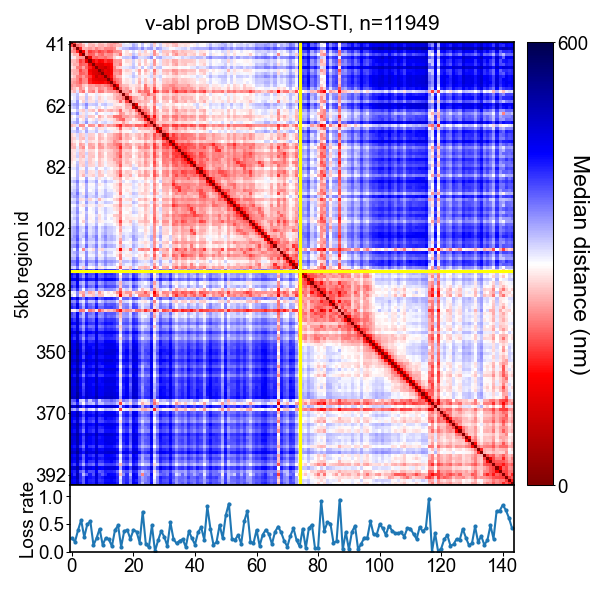

<ipython-input-97-88a202018572>:59: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("seismic"))
  contact_cmap.set_bad(color=[0.,0.,0.,1])
<ipython-input-97-88a202018572>:68: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  _pf = ax1.imshow(contact_map, cmap=contact_cmap, norm=contact_norm,vmin=contact_limits[0],


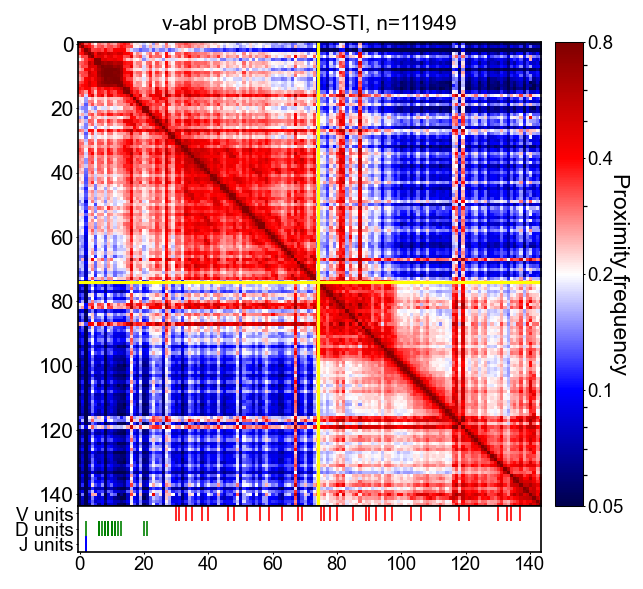

In [97]:
# Required plotting parameters
from ImageAnalysis3.figure_tools import _dpi,_single_col_width,_double_col_width,_single_row_height,_ref_bar_length, _ticklabel_size,_ticklabel_width
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.colors import LogNorm
_font_size = 9

fig, ax1 = plt.subplots(figsize=(_single_col_width*2, _single_col_width*2), dpi=150, )

ax1.set_title(f"v-abl proB DMSO-STI, n={len(distmaps)}", fontsize=10)
_pf = ax1.imshow(median_distmap, cmap='seismic_r', vmin=0, vmax=600)
ax1.axvline(x=np.where(dna_reg_ids>300)[0][0], color=[1,1,0])
ax1.axhline(y=np.where(dna_reg_ids>300)[0][0], color=[1,1,0])
_ticks = np.arange(0, len(dna_reg_ids), 20)
ax1.set_yticks(_ticks)
ax1.set_yticklabels(dna_reg_ids[_ticks])
ax1.set_ylabel(f"5kb region id", fontsize=_font_size, labelpad=1)


ax1.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelbottom=False) # remove bottom ticklabels for ax1
# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="3%")
cbar = plt.colorbar(_pf,cax=cax, ax=ax1, ticks=[0, 600])
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Median distance (nm)',
               fontsize=_font_size+2, labelpad=0, rotation=270)
# create bottom ax
bot_ax = divider.append_axes('bottom', size='15%', pad="0%", 
                             sharex=ax1, xticks=np.arange(0,len(median_distmap), 50), yticks=[0,0.5,1] )

bot_ax.plot(loss_rates, '.-', markersize=2, linewidth=1)
bot_ax.set_xticks(np.arange(0,len(median_distmap),20))
bot_ax.set_ylim([0,1.2])
bot_ax.set_ylabel(f"Loss rate", fontsize=9, labelpad=0)
bot_ax.tick_params('both', labelsize=_font_size, 
                   width=_ticklabel_width, length=_ticklabel_size,
                   pad=1, labelleft=True) # remove bottom ticklabels for ax1
plt.savefig(os.path.join(save_fig_folder, 'dmso_median_loss.png'), transparent=True)
plt.show()


from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.colors import LogNorm

_font_size = 9

contact_limits = [0.05, 0.8]
contact_norm = LogNorm(vmin=np.min(contact_limits), 
                       vmax=np.max(contact_limits))
contact_cmap = matplotlib.cm.get_cmap('seismic')
contact_cmap.set_bad(color=[0.,0.,0.,1])

contact_th = 200
contact_map = (distmaps < contact_th).sum(0) / (np.isnan(distmaps)==False).sum(0)

fig, ax1 = plt.subplots(figsize=(_single_col_width*2, _single_col_width*2), dpi=150, )
#_pf = ax1.imshow(median_distmap, cmap='seismic_r', vmin=0, vmax=600)
ax1.set_title(f"v-abl proB DMSO-STI, n={len(distmaps)}", fontsize=10)

_pf = ax1.imshow(contact_map, cmap=contact_cmap, norm=contact_norm,vmin=contact_limits[0],
                       vmax=contact_limits[1])

ax1.axvline(x=np.where(dna_reg_ids>300)[0][0], color=[1,1,0])
ax1.axhline(y=np.where(dna_reg_ids>300)[0][0], color=[1,1,0])
ax1.tick_params('both', labelsize=_font_size+1, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelbottom=False) # remove bottom ticklabels for ax1
# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="3%")
colorbar_ticks = [0.05, 0.1, 0.2, 0.4, 0.8]
cbar = plt.colorbar(_pf,cax=cax, ax=ax1, ticks=colorbar_ticks)
cbar.ax.set_yticklabels(colorbar_ticks)
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Proximity frequency',
               fontsize=_font_size+2, labelpad=2.5, rotation=270)
# create bottom ax
bot_ax = divider.append_axes('bottom', size='10%', pad="0%", 
                             sharex=ax1, xticks=np.arange(0,len(median_distmap), 20) )

bot_ax.eventplot(list(v_unit_2_inds.values()), lineoffsets=2.5, linewidths=0.8, colors='r')
bot_ax.eventplot(list(d_unit_2_inds.values()), lineoffsets=1.5, linewidths=0.8, colors='g')
bot_ax.eventplot(list(j_unit_2_inds.values()), lineoffsets=0.5, linewidths=0.8, colors='b')
bot_ax.set_ylim([0,3])
bot_ax.set_yticks([2.5,1.5, 0.5])
bot_ax.set_yticklabels(["V units", "D units", "J units"], fontsize=_font_size)
bot_ax.tick_params('both', labelsize=_font_size, 
                   width=_ticklabel_width, length=_ticklabel_size-1,
                   pad=1, labelleft=True) # remove bottom ticklabels for bot_ax
plt.savefig(os.path.join(save_fig_folder, 'dmso_proximity_vdj_feature.png'), transparent=True)
plt.show()